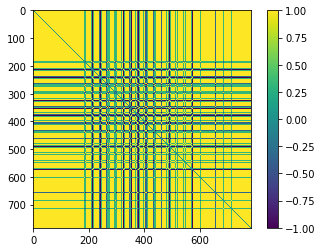

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import load_MNIST_data
from hf_net import HopfNet

# load data
training_data, validation_data, test_data = load_MNIST_data.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

# initiate a net
h_net = HopfNet(784)

# form memories
memory_img_count = 3
sample_list = np.random.permutation(len(training_data))

for j in range(memory_img_count):
    i = sample_list[j]
    input_sample = training_data[i]
    input_img = input_sample[0]

    input_img[input_img < 0.5] = -1
    input_img[input_img > 0.5] = 1

    h_net.train(input_img)
    
# show the weight matrix
plt.figure()
plt.imshow(h_net.w)
plt.colorbar()
plt.show()

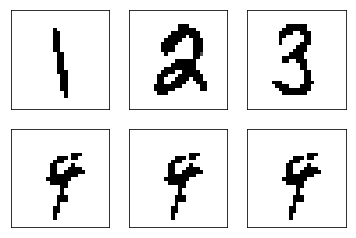

In [29]:
# retrieve memory
plot_n = 3
sample_list = np.random.permutation(len(test_data))

plt.figure()
for j in range(plot_n):
    i = sample_list[j]
    test_in_sample = test_data[i]
    
    test_in_img = test_in_sample[0]
    test_in_img[test_in_img < 0.5] = -1
    test_in_img[test_in_img > 0.5] = 1
    
    # show the img
    plt.subplot(2, plot_n, j+1)
    plt.imshow(np.reshape(test_in_img, [28, 28]), cmap='Greys')
    plt.tick_params(axis='both', which='both', bottom=0, left=0, labelbottom =0, labelleft=0)

    # retrieve memory
    test_out_img = h_net.retrieve(test_in_img)
    plt.subplot(2, plot_n, j+1+plot_n)
    plt.imshow(np.reshape(test_out_img, [28, 28]), cmap='Greys')
    plt.tick_params(axis='both', which='both', bottom=0, left=0, labelbottom =0, labelleft=0)
    
plt.show()